<a href="https://colab.research.google.com/github/pbhuch/GL_DecA_G4_NLP1/blob/NLP1_PB/GL_DecA_G4_NLP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Great Learning : AIML Online Capstone -AUTOMATIC TICKET ASSIGNMENT

DecA : Group 4: NLP 1

Group Members :
1. Priya Moily
2. Priyanka Gupta
3. Avinash Balani
4. Priyank Bhuch

Importing relavant Libraries

In [2]:
!pip install ftfy

     |████████████████████████████████| 64 kB 1.9 MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=ee452ffc20eecc36d0d41d5b57b6647249e92fc7c5f61b769f00b66b79cb83a6
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
Successfully built ftfy


In [3]:
#importing libraries
from time import time
from PIL import Image
from zipfile import ZipFile
import os, sys, itertools, re
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report
import sklearn.neighbors._base
#import sys
#sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
import imblearn
from imblearn.over_sampling import SMOTE

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Activation, Conv2D, MaxPooling2D, Reshape, Embedding, LSTM,  TimeDistributed, Bidirectional, Lambda, Input, Add, GlobalMaxPool1D
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
#import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# to define loss
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb

from itertools import islice

import re
import nltk
from nltk.corpus import stopwords

from ftfy import fix_encoding, fix_text, badness
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.utils import resample

import pickle, string

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

import spacy

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

SEED = 123                 # to be able to rerun the same NN
np.random.seed(SEED)
tf.random.set_seed(SEED)

from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [ ]:
dataset = pd.read_csv("/content/dataset1_mojibake_treated.csv", encoding = 'utf-8')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Short description            8409 non-null   object
 1   Description                  8416 non-null   object
 2   Caller                       8417 non-null   object
 3   Assignment group             8417 non-null   object
 4   combined_description_caller  8417 non-null   object
 5   combined_description         8417 non-null   object
dtypes: object(6)
memory usage: 394.7+ KB


In [ ]:
pip install langdetect


     |████████████████████████████████| 981 kB 5.3 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=bda496d9cd6a6c76ee871bef0c8ecede06764548685e84046a4c39d3b3b55130
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
from langdetect import detect

In [ ]:
def fn_lan_detect(df):                                        
   try:                                                          
      return detect(df)                                      
   except:                                                       
      return 'no'

In [ ]:
dataset['Language'] = dataset['combined_description'].apply(fn_lan_detect)

In [ ]:
dataset.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  \n\nreceived from: hmjdrvpb.komuaywn@gmail.com...  hmjdrvpb komuaywn   
2  \n\nreceived from: eylqgodm.ybqkwiam@gmail.com...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group                        combined_description_caller  \
0            GRP_0  login issue -verified user details.(employee# ...   
1            GRP_0  outlook received from: hmjdrvpb.komuaywn@gmail...   
2            GRP_0  cant log in to vpn received from: eylqgodm.ybq...   
3            GRP_0  unable to access hr_tool page unable to access...   
4            GRP_0          skype error skype error owlgqjme qhcozdfx   

                                combined_description Language  
0  login issue -verified user details.(employee# ...       en  
1  outlook received from: hmjdrvpb.komuaywn@gmail...       en  
2  cant log in to vpn received from: eylqgodm.ybq...       en  
3  unable to access hr_tool page unable to access...       en  
4                            skype error skype error       no

In [ ]:
# Define regex patterns
#EMAIL_PATTERN = r"([\w.+-]+@[a-z\d-]+\.[a-z\d.-]+)"
EMAIL_PATTERN = r'\S*@\S*\s?'
PUNCT_PATTERN = r"[,|@|\|?|\\|$&*|%|\r|\n|.:|\s+|/|//|\\|/|\||-|<|>|;|(|)|=|+|#|-|\"|[-\]]|{|}]"
# Negative Lookbehind for EmailId replacement- Don't match any number which follows the text "RetainedEmailId"
NUMER_PATTERN = r"(?<!RetainedEmailId)(\d+(?:\.\d+)?)"

# Define a function to treat the texts
def cleanseText(text):
    # Make the text unicase (lower) 
    text = str(text).lower()
    # Remove email adresses
    # text = re.sub(EMAIL_PATTERN, '', text, flags=re.IGNORECASE)
    # Save Email addresses and replace them with custom keyword
    email_dict = extract_email(text)
    for key in email_dict.keys():
        text = text.replace(email_dict[key], key)
    # Remove all numbers 
    text = re.sub(NUMER_PATTERN, '', text)
    # Replace all punctuations with blank space
    # text = re.sub(PUNCT_PATTERN, " ", text, flags=re.MULTILINE)
    text = text.translate(str.maketrans("","", string.punctuation))
    text = re.sub(r'\s+', ' ', text)
    # Replace multiple spaces from prev step to single
    text = re.sub(r' {2,}', " ", text, flags=re.MULTILINE)
    text = text.replace('`',"'")
    # Replace the email ids back into their original position
    for key in email_dict.keys():
        text = text.replace(key, email_dict[key])
    return text.strip()

def extract_email(text):
    # Replaces the email addresses with custom key word and 
    # save them into a dictionary for future use
    unique_emailid = set(re.findall(EMAIL_PATTERN, text))
    email_replacement = dict()
    for idx, email in enumerate(unique_emailid):
        email_replacement[f'RetainedEmailId{idx}'] = email
    return email_replacement

In [ ]:
# Apply the cleaning function to entire dataset
dataset['Description'] = dataset['Description'].apply(cleanseText)
dataset['Short description'] = dataset['Short description'].apply(cleanseText)
dataset['combined_description']=dataset['combined_description'].apply(cleanseText)
dataset['combined_description_caller']=dataset['combined_description_caller'].apply(cleanseText)

In [ ]:
dataset['Language'] = dataset['combined_description'].apply(fn_lan_detect)

In [ ]:
dataset['Language'].value_counts()

en       7010
de        415
af        271
it        121
fr        105
no         71
nl         68
sv         53
zh-cn      49
es         47
ca         39
pl         27
da         25
pt         17
ko         17
tl         11
cy         11
et         10
ro         10
sq          8
sl          6
hr          6
fi          5
vi          3
id          3
so          2
cs          2
lt          2
ja          1
tr          1
hu          1
Name: Language, dtype: int64

In [ ]:
pip install googletrans

     |████████████████████████████████| 55 kB 2.8 MB/s 
     |████████████████████████████████| 1.3 MB 8.4 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 65 kB 4.1 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15734 sha256=0153cf78da6c67223b347ed81c106819ae2776f50103873fdd3a1ae2c1de0ee2
  Stored in directory: /root/.cache/pip/wheels/20/da/eb/a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans


In [ ]:
import googletrans

In [ ]:
print (len(googletrans.LANGUAGES))

107


In [ ]:
text1 = "Subscribe my channel"
text2 = "suscribete a mi canal"

In [ ]:
from googletrans import Translator

In [ ]:
translator = Translator()

In [ ]:
translator

In [ ]:
#val = translator.translate(text2).text
print(text2)

suscribete a mi canal


In [ ]:
!pip install goslate

  Created wheel for goslate: filename=goslate-1.5.2-py3-none-any.whl size=11436 sha256=fd1907aa887674d89c617a8e1c6f36dee0a0bc37649c02895549a158f0cf7ff0
  Stored in directory: /root/.cache/pip/wheels/a8/8a/c4/85425eac5e0746fd5fc898801858331e55ac386f476d65e58d
Successfully built goslate


In [ ]:
svc_domains = ['.com','.com.au','.com.ar','.co.kr','.co.in','.co.jp','.at','.de','.ru','.ch','.fr','.es','.ae']
svc_urls = ['http://translate.google' + domain for domain in svc_domains]

In [ ]:
from goslate import Goslate

In [ ]:
gs = Goslate(service_urls=svc_urls)

In [ ]:
trans_8416 = gs.translate(dataset['combined_description'][8416], target_language='en', source_language='auto')

In [ ]:
dataset['combined_description'][8416]

'an mehreren pcs lassen sich verschiedene prgramdntyme nicht öffnen an mehreren pcs lassen sich verschiedene prgramdntyme nicht öffnen bereich cnc'

In [ ]:
print(trans_8416)

Several PCs can not open various prgramdntyms on several PCs can not open various prgramdntyms not open area CNC


In [ ]:
dataset.head()

Short description  \
0                   login issue   
1                       outlook   
2            cant log in to vpn   
3  unable to access hrtool page   
4                   skype error   

                                         Description             Caller  \
0  verified user detailsemployee manager name che...  spxjnwir pjlcoqds   
1  received from hmjdrvpb.komuaywn@gmail.com\n he...  hmjdrvpb komuaywn   
2  received from eylqgodm.ybqkwiam@gmail.com\n hi...  eylqgodm ybqkwiam   
3                       unable to access hrtool page  xbkucsvz gcpydteq   
4                                        skype error  owlgqjme qhcozdfx   

  Assignment group                        combined_description_caller  \
0            GRP_0  login issue verified user detailsemployee mana...   
1            GRP_0  outlook received from hmjdrvpb.komuaywn@gmail....   
2            GRP_0  cant log in to vpn received from eylqgodm.ybqk...   
3            GRP_0  unable to access hrtool page unable to access ...   
4            GRP_0          skype error skype error owlgqjme qhcozdfx   

                                combined_description Language  
0  login issue verified user detailsemployee mana...       en  
1  outlook received from hmjdrvpb.komuaywn@gmail....       en  
2  cant log in to vpn received from eylqgodm.ybqk...       en  
3  unable to access hrtool page unable to access ...       en  
4                            skype error skype error       no

In [ ]:
dataset.insert(loc=6,column='ConvertedToEnglish',value=np.nan,allow_duplicates=True)

In [ ]:
dataset.head()

Short description  \
0                   login issue   
1                       outlook   
2            cant log in to vpn   
3  unable to access hrtool page   
4                   skype error   

                                         Description             Caller  \
0  verified user detailsemployee manager name che...  spxjnwir pjlcoqds   
1  received from hmjdrvpb.komuaywn@gmail.com\n he...  hmjdrvpb komuaywn   
2  received from eylqgodm.ybqkwiam@gmail.com\n hi...  eylqgodm ybqkwiam   
3                       unable to access hrtool page  xbkucsvz gcpydteq   
4                                        skype error  owlgqjme qhcozdfx   

  Assignment group                        combined_description_caller  \
0            GRP_0  login issue verified user detailsemployee mana...   
1            GRP_0  outlook received from hmjdrvpb.komuaywn@gmail....   
2            GRP_0  cant log in to vpn received from eylqgodm.ybqk...   
3            GRP_0  unable to access hrtool page unable to access ...   
4            GRP_0          skype error skype error owlgqjme qhcozdfx   

                                combined_description  ConvertedToEnglish  \
0  login issue verified user detailsemployee mana...                 NaN   
1  outlook received from hmjdrvpb.komuaywn@gmail....                 NaN   
2  cant log in to vpn received from eylqgodm.ybqk...                 NaN   
3  unable to access hrtool page unable to access ...                 NaN   
4                            skype error skype error                 NaN   

  Language  
0       en  
1       en  
2       en  
3       en  
4       no

In [ ]:
datasetLang = dataset.groupby('Language')

In [ ]:
datasetLang_de = datasetLang.get_group('de')

In [ ]:
datasetLang_ko = datasetLang.get_group('ko')

In [ ]:
datasetLang_sq = datasetLang.get_group('sq')

In [ ]:
datasetLang_sq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 1028 to 7846
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Short description            8 non-null      object 
 1   Description                  8 non-null      object 
 2   Caller                       8 non-null      object 
 3   Assignment group             8 non-null      object 
 4   combined_description_caller  8 non-null      object 
 5   combined_description         8 non-null      object 
 6   ConvertedToEnglish           0 non-null      float64
 7   Language                     8 non-null      object 
dtypes: float64(1), object(7)
memory usage: 576.0+ bytes


In [ ]:
datasetLang_sq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 1028 to 7846
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Short description            8 non-null      object 
 1   Description                  8 non-null      object 
 2   Caller                       8 non-null      object 
 3   Assignment group             8 non-null      object 
 4   combined_description_caller  8 non-null      object 
 5   combined_description         8 non-null      object 
 6   ConvertedToEnglish           0 non-null      float64
 7   Language                     8 non-null      object 
dtypes: float64(1), object(7)
memory usage: 896.0+ bytes


In [ ]:
datasetLang_ko = dataset[dataset['Language']=='ko'].reset_index()

In [ ]:
datasetLang_ko.shape

(17, 9)

In [ ]:
for idx in range(datasetLang_ko.shape[0]):
  row_iter = gs.translate(datasetLang_ko['combined_description'][idx],target_language='en',source_language = 'auto')
  datasetLang_ko['ConvertedToEnglish'][idx] = str(row_iter)
  

HTTPError: ignored

In [ ]:
datasetLang_sq.head()

index                                  Short description  \
0   1028  lüfter defekt industriekontrollmonitor niptbwd...   
1   1648              probleme mit eutool tmqfjard qzhgdoua   
2   1665                      maus defekt niptbwdq csenjruz   
3   1761                   momitor defekt niptbwdq csenjruz   
4   2906                  probleme mit ie niptbwdq csenjruz   

                                         Description             Caller  \
0  lüfter defekt industriekontrollmonitor niptbwd...  niptbwdq csenjruz   
1              probleme mit eutool tmqfjard qzhgdoua  tmqfjard qzhgdoua   
2                      maus defekt niptbwdq csenjruz  niptbwdq csenjruz   
3                   momitor defekt niptbwdq csenjruz  niptbwdq csenjruz   
4                  probleme mit ie niptbwdq csenjruz  niptbwdq csenjruz   

  Assignment group                        combined_description_caller  \
0           GRP_24  lüfter defekt industriekontrollmonitor niptbwd...   
1           GRP_24  probleme mit eutool tmqfjard qzhgdoua probleme...   
2           GRP_24  maus defekt niptbwdq csenjruz maus defekt nipt...   
3           GRP_24  momitor defekt niptbwdq csenjruz momitor defek...   
4           GRP_24  probleme mit ie niptbwdq csenjruz probleme mit...   

                                combined_description  ConvertedToEnglish  \
0  lüfter defekt industriekontrollmonitor niptbwd...                 NaN   
1  probleme mit eutool tmqfjard qzhgdoua probleme...                 NaN   
2  maus defekt niptbwdq csenjruz maus defekt nipt...                 NaN   
3  momitor defekt niptbwdq csenjruz momitor defek...                 NaN   
4  probleme mit ie niptbwdq csenjruz probleme mit...                 NaN   

  Language  
0       sq  
1       sq  
2       sq  
3       sq  
4       sq

In [ ]:
df = pd.read_csv('/content/dataset1_mojibaked_LangDetect_NewColumnAdded.csv')

In [ ]:
df.head()

Unnamed: 0             Short description  \
0           0                   login issue   
1           1                       outlook   
2           2            cant log in to vpn   
3           3  unable to access hrtool page   
4           4                   skype error   

                                         Description             Caller  \
0  verified user detailsemployee manager name che...  spxjnwir pjlcoqds   
1  received from hmjdrvpb.komuaywn@gmail.com\n he...  hmjdrvpb komuaywn   
2  received from eylqgodm.ybqkwiam@gmail.com\n hi...  eylqgodm ybqkwiam   
3                       unable to access hrtool page  xbkucsvz gcpydteq   
4                                        skype error  owlgqjme qhcozdfx   

  Assignment group                        combined_description_caller  \
0            GRP_0  login issue verified user detailsemployee mana...   
1            GRP_0  outlook received from hmjdrvpb.komuaywn@gmail....   
2            GRP_0  cant log in to vpn received from eylqgodm.ybqk...   
3            GRP_0  unable to access hrtool page unable to access ...   
4            GRP_0          skype error skype error owlgqjme qhcozdfx   

                                combined_description  ConvertedToEnglish  \
0  login issue verified user detailsemployee mana...                 NaN   
1  outlook received from hmjdrvpb.komuaywn@gmail....                 NaN   
2  cant log in to vpn received from eylqgodm.ybqk...                 NaN   
3  unable to access hrtool page unable to access ...                 NaN   
4                            skype error skype error                 NaN   

  Language  
0       en  
1       en  
2       en  
3       en  
4       no

In [ ]:
regex = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'

In [ ]:
def fn_remove_irrelaventWords(df,columnName):
  for index in range(df.shape[0]):
    df[columnName][index] = df[columnName][index].lower()
    df[columnName][index] = re.sub(regex,"",df.loc[index,columnName])
    df[columnName][index] = re.sub(r'\S*@\S*\s?', '', df.loc[index,columnName])
    df[columnName][index] = re.sub(r"received from:",' ',df.loc[index,columnName])
    df[columnName][index] = re.sub(r"from:",' ',df.loc[index,columnName])
    df[columnName][index] = re.sub(r"to:",' ',df.loc[index,columnName])
    df[columnName][index] = re.sub(r"subject:",' ',df.loc[index,columnName])
    df[columnName][index] = re.sub(r"sent:",' ',df.loc[index,columnName])
    df[columnName][index] = re.sub(r"ic:",' ',df.loc[index,columnName])
    df[columnName][index] = re.sub(r"cc:",' ',df.loc[index,columnName])
    df[columnName][index] = re.sub(r"bcc:",' ',df.loc[index,columnName])
    # Remove numbers 
    df[columnName][index] = re.sub(r'\d+','' ,df.loc[index,columnName])
    # Remove new line characters 
    df[columnName][index] = re.sub(r'\n',' ',df.loc[index,columnName])
    # Remove hashtag while keeping hashtag text
    df[columnName][index] = re.sub(r'#','', df.loc[index,columnName])
    #& 
    df[columnName][index] = re.sub(r'&;?', 'and',df.loc[index,columnName])
    # Remove HTML special entities (e.g. &amp;)
    df[columnName][index] = re.sub(r'\&\w*;', '', df.loc[index,columnName])
    # Remove hyperlinks
    df[columnName][index] = re.sub(r'https?:\/\/.*\/\w*', '', df.loc[index,columnName])
  return df

In [ ]:
df_clean = fn_remove_irrelaventWords(df,'combined_description')

In [ ]:
df_clean.head()

Unnamed: 0             Short description  \
0           0                   login issue   
1           1                       outlook   
2           2            cant log in to vpn   
3           3  unable to access hrtool page   
4           4                   skype error   

                                         Description             Caller  \
0  verified user detailsemployee manager name che...  spxjnwir pjlcoqds   
1  received from hmjdrvpb.komuaywn@gmail.com\n he...  hmjdrvpb komuaywn   
2  received from eylqgodm.ybqkwiam@gmail.com\n hi...  eylqgodm ybqkwiam   
3                       unable to access hrtool page  xbkucsvz gcpydteq   
4                                        skype error  owlgqjme qhcozdfx   

  Assignment group                        combined_description_caller  \
0            GRP_0  login issue verified user detailsemployee mana...   
1            GRP_0  outlook received from hmjdrvpb.komuaywn@gmail....   
2            GRP_0  cant log in to vpn received from eylqgodm.ybqk...   
3            GRP_0  unable to access hrtool page unable to access ...   
4            GRP_0          skype error skype error owlgqjme qhcozdfx   

                                combined_description  ConvertedToEnglish  \
0  login issue verified user detailsemployee mana...                 NaN   
1  outlook received from   hello team my meetings...                 NaN   
2  cant log in to vpn received from   hi i cannot...                 NaN   
3  unable to access hrtool page unable to access ...                 NaN   
4                            skype error skype error                 NaN   

  Language  
0       en  
1       en  
2       en  
3       en  
4       no

In [ ]:
df_clean.to_csv("df_clean_combined_description")

In [3]:
df_final = pd.read_csv('/content/df_clean_combined_description_AllTranslated.csv',encoding='ISO-8859-1')

In [4]:
df_final.head()

Unnamed: 0  Unnamed: 0.1             Short description  \
0           0             0                   login issue   
1           1             1                       outlook   
2           2             2            cant log in to vpn   
3           3             3  unable to access hrtool page   
4           4             4                   skype error   

                                         Description             Caller  \
0  verified user detailsemployee manager name che...  spxjnwir pjlcoqds   
1  received from hmjdrvpb.komuaywn@gmail.com\n he...  hmjdrvpb komuaywn   
2  received from eylqgodm.ybqkwiam@gmail.com\n hi...  eylqgodm ybqkwiam   
3                       unable to access hrtool page  xbkucsvz gcpydteq   
4                                        skype error  owlgqjme qhcozdfx   

  Assignment group                        combined_description_caller  \
0            GRP_0  login issue verified user detailsemployee mana...   
1            GRP_0  outlook received from hmjdrvpb.komuaywn@gmail....   
2            GRP_0  cant log in to vpn received from eylqgodm.ybqk...   
3            GRP_0  unable to access hrtool page unable to access ...   
4            GRP_0          skype error skype error owlgqjme qhcozdfx   

                                combined_description Language  \
0  login issue verified user detailsemployee mana...       en   
1  outlook received from   hello team my meetings...       en   
2  cant log in to vpn received from   hi i cannot...       en   
3  unable to access hrtool page unable to access ...       en   
4                            skype error skype error       no   

                                  ConvertedToEnglish  
0  login issue verified user detailsemployee mana...  
1  outlook received from hello team my meetingssk...  
2  cant log in to vpn received from hi i cannot l...  
3  unable to access hrtool page unable to access ...  
4                            Skype Error Skype Error

In [5]:
for index in range(df_final.shape[0]):
    df_final['ConvertedToEnglish'][index] = df_final['ConvertedToEnglish'][index].lower()

In [6]:
df_final.head()

Unnamed: 0  Unnamed: 0.1             Short description  \
0           0             0                   login issue   
1           1             1                       outlook   
2           2             2            cant log in to vpn   
3           3             3  unable to access hrtool page   
4           4             4                   skype error   

                                         Description             Caller  \
0  verified user detailsemployee manager name che...  spxjnwir pjlcoqds   
1  received from hmjdrvpb.komuaywn@gmail.com\n he...  hmjdrvpb komuaywn   
2  received from eylqgodm.ybqkwiam@gmail.com\n hi...  eylqgodm ybqkwiam   
3                       unable to access hrtool page  xbkucsvz gcpydteq   
4                                        skype error  owlgqjme qhcozdfx   

  Assignment group                        combined_description_caller  \
0            GRP_0  login issue verified user detailsemployee mana...   
1            GRP_0  outlook received from hmjdrvpb.komuaywn@gmail....   
2            GRP_0  cant log in to vpn received from eylqgodm.ybqk...   
3            GRP_0  unable to access hrtool page unable to access ...   
4            GRP_0          skype error skype error owlgqjme qhcozdfx   

                                combined_description Language  \
0  login issue verified user detailsemployee mana...       en   
1  outlook received from   hello team my meetings...       en   
2  cant log in to vpn received from   hi i cannot...       en   
3  unable to access hrtool page unable to access ...       en   
4                            skype error skype error       no   

                                  ConvertedToEnglish  
0  login issue verified user detailsemployee mana...  
1  outlook received from hello team my meetingssk...  
2  cant log in to vpn received from hi i cannot l...  
3  unable to access hrtool page unable to access ...  
4                            skype error skype error

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
stopwords = set(stopwords.words('english'))
 # Remove stopwords
df_final['ConvertedToEnglish'] = df_final['ConvertedToEnglish'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

In [9]:
!pip install spacy

In [10]:
#lemmatization
# Initialize spacy 'en' medium model, keeping only tagger component needed for lemmatization
nlp = spacy.load('en', disable=['parser', 'ner'])

# Define a function to lemmatize the descriptions
def lemmatizer(sentence):
    # Parse the sentence using the loaded 'en' model object `nlp`
    doc = nlp(sentence)
    return " ".join([token.lemma_ for token in doc if token.lemma_ !='-PRON-'])

In [11]:
print('\033[1mOriginal text:\033[0m')
print(df_final['ConvertedToEnglish'][50])
print('_'*100)
print('\033[1mLemmatized text:\033[0m')
print(lemmatizer(df_final['ConvertedToEnglish'][50]))

Original text:
job mmzscrdlymerktc failed jobscheduler received job mmzscrdlymerktc failed jobscheduler
____________________________________________________________________________________________________
Lemmatized text:
job mmzscrdlymerktc fail jobscheduler receive job mmzscrdlymerktc fail jobscheduler


In [12]:
df_final['ConvertedToEnglish'] = df_final['ConvertedToEnglish'].apply(lemmatizer)

In [13]:
df_final.head(10)

Unnamed: 0  Unnamed: 0.1  \
0           0             0   
1           1             1   
2           2             2   
3           3             3   
4           4             4   
5           5             5   
6           6             6   
7           7             7   
8           8             8   
9           9             9   

                                   Short description  \
0                                        login issue   
1                                            outlook   
2                                 cant log in to vpn   
3                       unable to access hrtool page   
4                                        skype error   
5     unable to log in to engineering tool and skype   
6  event criticalhostnamecompanycom the value of ...   
7  ticketno employment status new nonemployee ent...   
8               unable to disable add ins on outlook   
9                           ticket update on inplant   

                                         Description             Caller  \
0  verified user detailsemployee manager name che...  spxjnwir pjlcoqds   
1  received from hmjdrvpb.komuaywn@gmail.com\n he...  hmjdrvpb komuaywn   
2  received from eylqgodm.ybqkwiam@gmail.com\n hi...  eylqgodm ybqkwiam   
3                       unable to access hrtool page  xbkucsvz gcpydteq   
4                                        skype error  owlgqjme qhcozdfx   
5     unable to log in to engineering tool and skype  eflahbxn ltdgrvkz   
6  event criticalhostnamecompanycom the value of ...  jyoqwxhz clhxsoqy   
7  ticketno employment status new nonemployee ent...  eqzibjhw ymebpoih   
8               unable to disable add ins on outlook  mdbegvct dbvichlg   
9                           ticket update on inplant  fumkcsji sarmtlhy   

  Assignment group                        combined_description_caller  \
0            GRP_0  login issue verified user detailsemployee mana...   
1            GRP_0  outlook received from hmjdrvpb.komuaywn@gmail....   
2            GRP_0  cant log in to vpn received from eylqgodm.ybqk...   
3            GRP_0  unable to access hrtool page unable to access ...   
4            GRP_0          skype error skype error owlgqjme qhcozdfx   
5            GRP_0  unable to log in to engineering tool and skype...   
6            GRP_1  event criticalhostnamecompanycom the value of ...   
7            GRP_0  ticketno employment status new nonemployee ent...   
8            GRP_0  unable to disable add ins on outlook unable to...   
9            GRP_0  ticket update on inplant ticket update on inpl...   

                                combined_description Language  \
0  login issue verified user detailsemployee mana...       en   
1  outlook received from   hello team my meetings...       en   
2  cant log in to vpn received from   hi i cannot...       en   
3  unable to access hrtool page unable to access ...       en   
4                            skype error skype error       no   
5  unable to log in to engineering tool and skype...       en   
6  event criticalhostnamecompanycom the value of ...       en   
7  ticketno employment status new nonemployee ent...       en   
8  unable to disable add ins on outlook unable to...       en   
9  ticket update on inplant ticket update on inplant       en   

                                  ConvertedToEnglish  
0  login issue verify user detailsemployee manage...  
1  outlook receive hello team meetingsskype meeti...  
2    can not log vpn receive hi can not log vpn best  
3  unable access hrtool page unable access hrtool...  
4                            skype error skype error  
5  unable log engineering tool skype unable log e...  
6  event criticalhostnamecompanycom value mountpo...  
7  ticketno employment status new nonemployee ent...  
8  unable disable add ins outlook unable disable ...  
9        ticket update inplant ticket update inplant

In [14]:
df_final.to_csv("dataset1_Cleaned_Translated_StopWords_Lemmatized.csv")

In [16]:
df_final.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Short description', 'Description',
       'Caller', 'Assignment group', 'combined_description_caller',
       'combined_description', 'Language', 'ConvertedToEnglish'],
      dtype='object')

In [17]:
df_final.drop(['Unnamed: 0.1'],axis=1)

Unnamed: 0                                  Short description  \
0              0                                        login issue   
1              1                                            outlook   
2              2                                 cant log in to vpn   
3              3                       unable to access hrtool page   
4              4                                        skype error   
5              5     unable to log in to engineering tool and skype   
6              6  event criticalhostnamecompanycom the value of ...   
7              7  ticketno employment status new nonemployee ent...   
8              8               unable to disable add ins on outlook   
9              9                           ticket update on inplant   
10            10  engineering tool says not connected and unable...   
11            11             hrtool site not loading page correctly   
12            12  unable to login to hrtool to sgxqsuojr xwbesor...   
13            13                   user wants to reset the password   
14            14                            unable to open payslips   
15            15                           ticket update on inplant   
16            16                     unable to login to company vpn   
17            17        when undocking pc screen will not come back   
18            18                             erp sid account locked   
19            19                            unable to sign into vpn   
20            20                           unable to check payslips   
21            21                                          vpn issue   
22            22                           unable to connect to vpn   
23            23                user called for vendor phone number   
24            24                                    vpn not working   
25            25                             erp sid password reset   
26            26        unable to login to hrtool to check payslips   
27            27                                 account locked out   
28            28                          unable to login to hrtool   
29            29                        unable to log in to erp sid   
30            30           password reset for collaborationplatform   
31            31                                        reset users   
32            32                     duplication of network address   
33            33                                 ess password reset   
34            34                     unable to install flash player   
35            35          ticketnoemployment status new nonemployee   
36            36          erp sid account unlock and password reset   
37            37        unable to resolve ticketno assigned to self   
38            38                        installing engineering tool   
39            39                         call for ecwtrjnq jpecxuty   
40            40                              ticket update inplant   
41            41                           tablet sound not working   
42            42                          unable to login to system   
43            43  please reroute jobs on printer to printer issu...   
44            44                    unable to login to hrtool etime   
45            45  can not log into hrtool etime through single s...   
46            46  password changed in passwordmanagementtool but...   
47            47                  job job failed in jobscheduler at   
48            48  windows password change via passwordmanagement...   
49            49        status does not change on telephonysoftware   
50            50      job mmzscrdlymerktc failed in jobscheduler at   
51            51  vip i need my passwordmanagementtool password ...   
52            52                         reset scmsoftware password   
53            53                 account locked out while in office   
54            54                                      skype meeting   
55            55              

In [18]:
df_final.head()

Unnamed: 0  Unnamed: 0.1             Short description  \
0           0             0                   login issue   
1           1             1                       outlook   
2           2             2            cant log in to vpn   
3           3             3  unable to access hrtool page   
4           4             4                   skype error   

                                         Description             Caller  \
0  verified user detailsemployee manager name che...  spxjnwir pjlcoqds   
1  received from hmjdrvpb.komuaywn@gmail.com\n he...  hmjdrvpb komuaywn   
2  received from eylqgodm.ybqkwiam@gmail.com\n hi...  eylqgodm ybqkwiam   
3                       unable to access hrtool page  xbkucsvz gcpydteq   
4                                        skype error  owlgqjme qhcozdfx   

  Assignment group                        combined_description_caller  \
0            GRP_0  login issue verified user detailsemployee mana...   
1            GRP_0  outlook received from hmjdrvpb.komuaywn@gmail....   
2            GRP_0  cant log in to vpn received from eylqgodm.ybqk...   
3            GRP_0  unable to access hrtool page unable to access ...   
4            GRP_0          skype error skype error owlgqjme qhcozdfx   

                                combined_description Language  \
0  login issue verified user detailsemployee mana...       en   
1  outlook received from   hello team my meetings...       en   
2  cant log in to vpn received from   hi i cannot...       en   
3  unable to access hrtool page unable to access ...       en   
4                            skype error skype error       no   

                                  ConvertedToEnglish  
0  login issue verify user detailsemployee manage...  
1  outlook receive hello team meetingsskype meeti...  
2    can not log vpn receive hi can not log vpn best  
3  unable access hrtool page unable access hrtool...  
4                            skype error skype error

In [ ]:
def fn_decode_to_ascii(df):
  text = df.encode().decode('utf-8').encode('ascii', 'ignore')
  return text.decode("utf-8") 

df['combined_description'] = df['combined_description'].apply(fn_decode_to_ascii)

In [ ]:
df_withCleanData = fn_remove_irrelaventWords(df,"combined_description")

In [ ]:
df_withCleanData.to_csv("dataset1_combined_CleanData")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


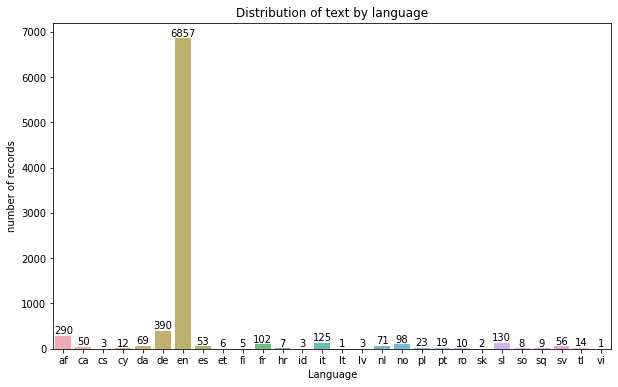

In [ ]:
x = df["Language"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

In [ ]:
pip install goslate

In [ ]:
from goslate import Goslate

In [ ]:
import goslate

In [ ]:
svc_domains = ['.com','.com.au','.com.ar','.co.kr','.co.in','.co.jp','.at','.de','.ru','.ch','.fr','.es','.ae']
svc_urls = ['http://translate.google' + domain for domain in svc_domains]

In [ ]:
gs = goslate.Goslate()

In [ ]:
dataset.head()

Short description  \
0                   login issue   
1                       outlook   
2            cant log in to vpn   
3  unable to access hrtool page   
4                   skype error   

                                         Description             Caller  \
0  verified user detailsemployee manager name che...  spxjnwir pjlcoqds   
1  received from hmjdrvpb.komuaywn@gmail.com\n he...  hmjdrvpb komuaywn   
2  received from eylqgodm.ybqkwiam@gmail.com\n hi...  eylqgodm ybqkwiam   
3                       unable to access hrtool page  xbkucsvz gcpydteq   
4                                        skype error  owlgqjme qhcozdfx   

  Assignment group                        combined_description_caller  \
0            GRP_0  login issue verified user detailsemployee mana...   
1            GRP_0  outlook received from hmjdrvpb.komuaywn@gmail....   
2            GRP_0  cant log in to vpn received from eylqgodm.ybqk...   
3            GRP_0  unable to access hrtool page unable to access ...   
4            GRP_0                            skype error skype error   

                                combined_description Language  
0  login issue verified user detailsemployee mana...       en  
1  outlook received from hmjdrvpb.komuaywn@gmail....       en  
2  cant log in to vpn received from eylqgodm.ybqk...       en  
3  unable to access hrtool page unable to access ...       it  
4                            skype error skype error       no

In [ ]:
datasetByLanguage = dataset.groupby('Language')

In [ ]:
datasetByLanguage_so = datasetByLanguage.get_group('so')

In [ ]:
datasetByLanguage_so.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 2086 to 7964
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Short description            3 non-null      object
 1   Description                  3 non-null      object
 2   Caller                       3 non-null      object
 3   Assignment group             3 non-null      object
 4   combined_description_caller  3 non-null      object
 5   combined_description         3 non-null      object
 6   Language                     3 non-null      object
dtypes: object(7)
memory usage: 192.0+ bytes


In [ ]:
#df_withCleanData['ConvertedToEnglish'] = df_withCleanData['combined_description']

In [ ]:
def fn_convertToEnglish(df,columnName):
  for index, rows in df.iterrows:
    df['FinalTranslation'][index] = gs.translate(df[columnName][index],'en','so')

In [ ]:
def fn_converToEng(text):
  text = gs.translate(text,'en','auto')

In [ ]:
datasetByLanguage_so['combined_description'] = datasetByLanguage_so['combined_description'].apply(fn_converToEng)

HTTPError: ignored

In [ ]:
pip install -U deep_translator

     |████████████████████████████████| 97 kB 7.7 MB/s 
     |████████████████████████████████| 97 kB 8.6 MB/s 
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.0.3 which is incompatible.


In [ ]:
from deep_translator import GoogleTranslator

In [ ]:
def fn_convertToEnglish_deepTrans(df,columnName):
  for index in range(len(df)):
    if not df['Language'][index] == "en":
      #gs.translate(df[columnName][index],'en',source_language='auto')
      translated = GoogleTranslator(source='auto',target='en').translate(text=df[columnName][index])
      df[columnName][index]=translated

In [ ]:
fn_convertToEnglish_deepTrans(df_withCleanData,'ConvertedToEnglish')

NotValidPayload: ignored

In [ ]:
df_withCleanData['combined_description'] = df_withCleanData.apply(lambda x: x['com'])

In [ ]:
def fn_translate(df,lang):
  try:
    if lang == 'en':
        return df
    else:
        return translator.translate(df).text
  except:
    return df
    
    
df['English_Description'] = df.apply(lambda x: fn_translate(x['combined_description'], x['Language']), axis=1)

In [ ]:
df.head()

combined_description Language  \
0  login issue -verified user details.(employee# ...       en   
1  outlook _x000D_\n_x000D_\nreceived from: hmjdr...       en   
2  cant log in to vpn _x000D_\n_x000D_\nreceived ...       en   
3  unable to access hr_tool page unable to access...       en   
4                            skype error skype error       no   

                                 English_Description  
0  login issue -verified user details.(employee# ...  
1  outlook _x000D_\n_x000D_\nreceived from: hmjdr...  
2  cant log in to vpn _x000D_\n_x000D_\nreceived ...  
3  unable to access hr_tool page unable to access...  
4                            skype error skype error

In [ ]:
df.shape

(8417, 3)

In [ ]:
df_copy['English_Description'] = df['English_Description']

In [ ]:
df_copy.head()

Unnamed: 0              Short description  \
0           0                    login issue   
1           1                        outlook   
2           2             cant log in to vpn   
3           3  unable to access hr_tool page   
4           4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
2  _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group                               combined_description  \
0            GRP_0  login issue -verified user details.(employee# ...   
1            GRP_0  outlook _x000D_\n_x000D_\nreceived from: hmjdr...   
2            GRP_0  cant log in to vpn _x000D_\n_x000D_\nreceived ...   
3            GRP_0  unable to access hr_tool page unable to access...   
4            GRP_0                            skype error skype error   

                         combined_description_caller  \
0  login issue -verified user details.(employee# ...   
1  outlook _x000D_\n_x000D_\nreceived from: hmjdr...   
2  cant log in to vpn _x000D_\n_x000D_\nreceived ...   
3  unable to access hr_tool page unable to access...   
4          skype error skype error owlgqjme qhcozdfx   

                                 English_Description  
0  login issue -verified user details.(employee# ...  
1  outlook _x000D_\n_x000D_\nreceived from: hmjdr...  
2  cant log in to vpn _x000D_\n_x000D_\nreceived ...  
3  unable to access hr_tool page unable to access...  
4                            skype error skype error

In [ ]:
df_copy['Language'] = df['Language']

In [ ]:
df_copy.head()

Unnamed: 0              Short description  \
0           0                    login issue   
1           1                        outlook   
2           2             cant log in to vpn   
3           3  unable to access hr_tool page   
4           4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
2  _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group                               combined_description  \
0            GRP_0  login issue -verified user details.(employee# ...   
1            GRP_0  outlook _x000D_\n_x000D_\nreceived from: hmjdr...   
2            GRP_0  cant log in to vpn _x000D_\n_x000D_\nreceived ...   
3            GRP_0  unable to access hr_tool page unable to access...   
4            GRP_0                            skype error skype error   

                         combined_description_caller  \
0  login issue -verified user details.(employee# ...   
1  outlook _x000D_\n_x000D_\nreceived from: hmjdr...   
2  cant log in to vpn _x000D_\n_x000D_\nreceived ...   
3  unable to access hr_tool page unable to access...   
4          skype error skype error owlgqjme qhcozdfx   

                                 English_Description Language  
0  login issue -verified user details.(employee# ...       en  
1  outlook _x000D_\n_x000D_\nreceived from: hmjdr...       en  
2  cant log in to vpn _x000D_\n_x000D_\nreceived ...       en  
3  unable to access hr_tool page unable to access...       en  
4                            skype error skype error       no

In [ ]:
df_copy.to_csv("dataset1_combined_translatedToEnglish")

In [4]:
df = pd.read_csv('/content/dataset1_Cleaned_Translated_StopWords_Lemmatized.csv')

In [5]:
df.head()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1             Short description  \
0           0             0               0                   login issue   
1           1             1               1                       outlook   
2           2             2               2            cant log in to vpn   
3           3             3               3  unable to access hrtool page   
4           4             4               4                   skype error   

                                         Description             Caller  \
0  verified user detailsemployee manager name che...  spxjnwir pjlcoqds   
1  received from hmjdrvpb.komuaywn@gmail.com\n he...  hmjdrvpb komuaywn   
2  received from eylqgodm.ybqkwiam@gmail.com\n hi...  eylqgodm ybqkwiam   
3                       unable to access hrtool page  xbkucsvz gcpydteq   
4                                        skype error  owlgqjme qhcozdfx   

  Assignment group                        combined_description_caller  \
0            GRP_0  login issue verified user detailsemployee mana...   
1            GRP_0  outlook received from hmjdrvpb.komuaywn@gmail....   
2            GRP_0  cant log in to vpn received from eylqgodm.ybqk...   
3            GRP_0  unable to access hrtool page unable to access ...   
4            GRP_0          skype error skype error owlgqjme qhcozdfx   

                                combined_description Language  \
0  login issue verified user detailsemployee mana...       en   
1  outlook received from   hello team my meetings...       en   
2  cant log in to vpn received from   hi i cannot...       en   
3  unable to access hrtool page unable to access ...       en   
4                            skype error skype error       no   

                                  ConvertedToEnglish  
0  login issue verify user detailsemployee manage...  
1  outlook receive hello team meetingsskype meeti...  
2    can not log vpn receive hi can not log vpn best  
3  unable access hrtool page unable access hrtool...  
4                            skype error skype error

In [8]:
df = df.drop(columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Short description','Description','combined_description_caller','combined_description'],axis=1)

In [9]:
df.head()

Caller Assignment group Language  \
0  spxjnwir pjlcoqds            GRP_0       en   
1  hmjdrvpb komuaywn            GRP_0       en   
2  eylqgodm ybqkwiam            GRP_0       en   
3  xbkucsvz gcpydteq            GRP_0       en   
4  owlgqjme qhcozdfx            GRP_0       no   

                                  ConvertedToEnglish  
0  login issue verify user detailsemployee manage...  
1  outlook receive hello team meetingsskype meeti...  
2    can not log vpn receive hi can not log vpn best  
3  unable access hrtool page unable access hrtool...  
4                            skype error skype error

In [10]:
df.shape

(8417, 4)

In [12]:
df.insert(loc=4,column='pred_group',value=np.nan,allow_duplicates=True)

In [13]:
df.head()

Caller Assignment group Language  \
0  spxjnwir pjlcoqds            GRP_0       en   
1  hmjdrvpb komuaywn            GRP_0       en   
2  eylqgodm ybqkwiam            GRP_0       en   
3  xbkucsvz gcpydteq            GRP_0       en   
4  owlgqjme qhcozdfx            GRP_0       no   

                                  ConvertedToEnglish  pred_group  
0  login issue verify user detailsemployee manage...         NaN  
1  outlook receive hello team meetingsskype meeti...         NaN  
2    can not log vpn receive hi can not log vpn best         NaN  
3  unable access hrtool page unable access hrtool...         NaN  
4                            skype error skype error         NaN

In [15]:
df_copy = df.copy()

In [14]:
def deterministicRules(df,columnName):
  for i in range(df.shape[0]):
      #1 Contains telephony_software > GRP_7
    if pd.notna(df[columnName][i]):
      if ('telephonysoftware' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_7'
      #2 contains cutview >  GRP_66
      elif ('cutview' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_66'
      #3 contains engg application >  GRP_58
      elif ('engg application' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_58'
      #4 contains ethics >  GRP_23
      elif ('ethics' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_23'
      # contains crm dynamics >  GRP_22
      elif ('crm dynamics' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_22'
      # contains distributor tool & company center >  GRP_21
      elif ('distributor tool' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_21'
      elif ('company center' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_21'
      # contains bpctwhsn kzqsbmtp & network outage or circuit outage >  GRP_8
      elif (df['Caller'][i] == 'bpctwhsn kzqsbmtp' and ('network outage' in df[columnName][i] or 'circuit outage' in df[columnName][i])):
        df['pred_group'][i] = 'GRP_8'
      elif ('reset passwords' in df[columnName][i] and 'the' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_17'
      elif (df[columnName][i].startswith('erp access issue')):
        df['pred_group'][i] = 'GRP_2'
      elif ('vsphere' in df[columnName][i] or 'esxi' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_12'
      elif ('windows account' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_0'
      elif ('erp sid account lock' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_0'
      elif ('erp sid password reset' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_0'
      elif(df['Caller'][i] == 'jionmpsf wnkpzcmv' and 'eutool' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_24'
      elif(df['Caller'][i] == 'cwrikael oanmsecr' and 'eutool' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_0'
      elif ('sso portal' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_73'
      elif ('unable complete forecast' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_67'
      elif (df[columnName][i].startswith('timecard') or df[columnName][i].startswith('time card')):
        df['pred_group'][i] = 'GRP_36'
      
        
      







In [16]:
deterministicRules(df,'ConvertedToEnglish')

In [25]:
df_determinted = df[~df['pred_group'].isna()]

In [27]:
df_determinted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 18 to 8413
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Caller              354 non-null    object
 1   Assignment group    354 non-null    object
 2   Language            354 non-null    object
 3   ConvertedToEnglish  354 non-null    object
 4   pred_group          354 non-null    object
dtypes: object(5)
memory usage: 16.6+ KB


In [29]:
df_determinted.head(10)

Caller Assignment group Language  \
18   nqdyowsm yqerwtna            GRP_0       en   
25   jqhtkfsm xoehtbnl            GRP_0       af   
49   aofnvyzt eqiyskhm            GRP_7       en   
80   ilvortuq zfgrlewm            GRP_0       en   
154  hckvpary emxbpkwy           GRP_17       en   
162  kcipjago mlkptgvb            GRP_0       en   
164  uvwphrbl hfqdumtv            GRP_0       en   
182  lvxakohq tsfnhowj            GRP_0       en   
272  kiqrvwat gwkpxzyt            GRP_0       en   
278  afijkocw rjtxslpa            GRP_0       en   

                                    ConvertedToEnglish pred_group  
18           erp sid account lock erp sid account lock      GRP_0  
25       erp sid password reset erp sid password reset      GRP_0  
49   status change telephonysoftware closing call a...      GRP_7  
80           erp sid account lock erp sid account lock      GRP_0  
154  reset passwords hckvpary emxbpkwy use password...     GRP_17  
162    windows account lockout windows account lockout      GRP_0  
164          account lock erp sid account lock erp sid      GRP_0  
182           windows account lock window account lock      GRP_0  
272           windows account lock window account lock      GRP_0  
278          erp sid account lock erp sid account lock      GRP_0

In [28]:
df_determinted['pred_group'].value_counts()

GRP_0     176
GRP_7      83
GRP_2      27
GRP_21     21
GRP_22     16
GRP_66      7
GRP_23      6
GRP_12      5
GRP_36      4
GRP_24      3
GRP_58      2
GRP_17      2
GRP_73      1
GRP_67      1
Name: pred_group, dtype: int64